In [1]:
import pandas as pd
import numpy as np
import numba as nb

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
column_names = pd.read_csv("allhypo-edit.names.txt")

In [4]:
list(column_names)

['age',
 ' sex',
 ' on thyroxine',
 ' query on thyroxine',
 ' on antithyroid medication',
 ' sick',
 ' pregnant',
 ' thyroid surgery',
 ' I131 treatment',
 ' query hypothyroid',
 ' query hyperthyroid',
 ' lithium',
 ' goitre',
 ' tumor',
 ' hypopituitary',
 ' psych',
 ' TSH measured',
 ' TSH',
 ' T3 measured',
 ' T3',
 ' TT4 measured',
 ' TT4',
 ' T4U measured',
 ' T4U',
 ' FTI measured',
 ' FTI',
 ' TBG measured',
 ' TBG',
 ' referral source',
 ' classes']

In [5]:
names = ['age',
 'sex',
 'on thyroxine',
 'query on thyroxine',
 'on antithyroid medication',
 'sick',
 'pregnant',
 'thyroid surgery',
 'I131 treatment',
 'query hypothyroid',
 'query hyperthyroid',
 'lithium',
 'goitre',
 'tumor',
 'hypopituitary',
 'psych',
 'TSH measured',
 'TSH',
 'T3 measured',
 'T3',
 'TT4 measured',
 'TT4',
 'T4U measured',
 'T4U',
 'FTI measured',
 'FTI',
 'TBG measured',
 'TBG',
 'referral source',
 'classes']

In [6]:
hypodata = pd.read_csv("allhypo.data.txt", header=None)

In [7]:
hypodata.columns = names

In [8]:
hypodata.head()

age sex on thyroxine query on thyroxine on antithyroid medication sick  \
0  41   F            f                  f                         f    f   
1  23   F            f                  f                         f    f   
2  46   M            f                  f                         f    f   
3  70   F            t                  f                         f    f   
4  70   F            f                  f                         f    f   

  pregnant thyroid surgery I131 treatment query hypothyroid       ...        \
0        f               f              f                 f       ...         
1        f               f              f                 f       ...         
2        f               f              f                 f       ...         
3        f               f              f                 f       ...         
4        f               f              f                 f       ...         

  TT4 measured  TT4 T4U measured   T4U FTI measured  FTI TBG measured TBG  \
0            t  125            t  1.14            t  109            f   ?   
1            t  102            f     ?            f    ?            f   ?   
2            t  109            t  0.91            t  120            f   ?   
3            t  175            f     ?            f    ?            f   ?   
4            t   61            t  0.87            t   70            f   ?   

  referral source         classes  
0            SVHC  negative.|3733  
1           other  negative.|1442  
2           other  negative.|2965  
3           other   negative.|806  
4             SVI  negative.|2807  

[5 rows x 30 columns]

In [9]:
hypotest = pd.read_csv("allhypo.test.txt",header=None)

In [10]:
hypotest.columns = names

In [11]:
hypotest.head(5)

age sex on thyroxine query on thyroxine on antithyroid medication sick  \
0   35   F            f                  f                         f    f   
1   63   M            f                  f                         f    f   
2   25   F            f                  f                         f    f   
3   53   F            f                  f                         f    f   
4   92   F            f                  f                         f    f   

  pregnant thyroid surgery I131 treatment query hypothyroid       ...        \
0        f               f              f                 f       ...         
1        f               f              f                 f       ...         
2        f               f              f                 f       ...         
3        f               f              f                 t       ...         
4        f               f              f                 f       ...         

  TT4 measured  TT4 T4U measured   T4U FTI measured  FTI TBG measured TBG  \
0            f    ?            f     ?            f    ?            f   ?   
1            t  108            t  0.96            t  113            f   ?   
2            t   61            t  0.82            t   75            f   ?   
3            t  145            t  1.03            t  141            f   ?   
4            t  120            t  0.84            t  143            f   ?   

  referral source         classes  
0           other   negative.|219  
1             SVI  negative.|2059  
2            SVHD   negative.|399  
3           other  negative.|1911  
4             SVI   negative.|487  

[5 rows x 30 columns]

In [12]:
# split "classes" on ".|" to get class label  
hypodata_class = hypodata["classes"].str.split('.\|', 1, expand=True).rename(columns={0:'classes', 1:'id?'})

In [13]:
hypodata_class.head()

classes   id?
0  negative  3733
1  negative  1442
2  negative  2965
3  negative   806
4  negative  2807

In [14]:
hypodata['classes'] = hypodata_class['classes']

In [15]:
hypodata.head()

age sex on thyroxine query on thyroxine on antithyroid medication sick  \
0  41   F            f                  f                         f    f   
1  23   F            f                  f                         f    f   
2  46   M            f                  f                         f    f   
3  70   F            t                  f                         f    f   
4  70   F            f                  f                         f    f   

  pregnant thyroid surgery I131 treatment query hypothyroid    ...     \
0        f               f              f                 f    ...      
1        f               f              f                 f    ...      
2        f               f              f                 f    ...      
3        f               f              f                 f    ...      
4        f               f              f                 f    ...      

  TT4 measured  TT4 T4U measured   T4U FTI measured  FTI TBG measured TBG  \
0            t  125            t  1.14            t  109            f   ?   
1            t  102            f     ?            f    ?            f   ?   
2            t  109            t  0.91            t  120            f   ?   
3            t  175            f     ?            f    ?            f   ?   
4            t   61            t  0.87            t   70            f   ?   

  referral source   classes  
0            SVHC  negative  
1           other  negative  
2           other  negative  
3           other  negative  
4             SVI  negative  

[5 rows x 30 columns]

In [16]:
hypodata.to_csv("hypodata_pd.csv", encoding='utf-8', index=False)

In [17]:
# split "classes" on ".|" to get class label on test data too
hypotest_class = hypotest["classes"].str.split('.\|', 1, expand=True).rename(columns={0:'classes', 1:'id?'})

In [18]:
hypotest_class.head()

classes   id?
0  negative   219
1  negative  2059
2  negative   399
3  negative  1911
4  negative   487

In [19]:
hypotest['classes'] = hypotest_class['classes']

In [20]:
hypotest.head(4)

age sex on thyroxine query on thyroxine on antithyroid medication sick  \
0   35   F            f                  f                         f    f   
1   63   M            f                  f                         f    f   
2   25   F            f                  f                         f    f   
3   53   F            f                  f                         f    f   

  pregnant thyroid surgery I131 treatment query hypothyroid    ...     \
0        f               f              f                 f    ...      
1        f               f              f                 f    ...      
2        f               f              f                 f    ...      
3        f               f              f                 t    ...      

  TT4 measured  TT4 T4U measured   T4U FTI measured  FTI TBG measured TBG  \
0            f    ?            f     ?            f    ?            f   ?   
1            t  108            t  0.96            t  113            f   ?   
2            t   61            t  0.82            t   75            f   ?   
3            t  145            t  1.03            t  141            f   ?   

  referral source   classes  
0           other  negative  
1             SVI  negative  
2            SVHD  negative  
3           other  negative  

[4 rows x 30 columns]

In [21]:
hypotest.to_csv("hypotest_pd.csv", encoding='utf-8', index=False)

In [22]:
hypodata['TBG'].describe()

count     2800
unique       1
top          ?
freq      2800
Name: TBG, dtype: object

In [23]:
# drop 'TBG' column which contains no value. 
hypodata.drop(labels=['TBG', 'TBG measured'], axis=1, index=None, columns=None, level=None, inplace=True, errors='raise')

In [24]:
hypodata.head()

age sex on thyroxine query on thyroxine on antithyroid medication sick  \
0  41   F            f                  f                         f    f   
1  23   F            f                  f                         f    f   
2  46   M            f                  f                         f    f   
3  70   F            t                  f                         f    f   
4  70   F            f                  f                         f    f   

  pregnant thyroid surgery I131 treatment query hypothyroid    ...     \
0        f               f              f                 f    ...      
1        f               f              f                 f    ...      
2        f               f              f                 f    ...      
3        f               f              f                 f    ...      
4        f               f              f                 f    ...      

  T3 measured   T3 TT4 measured  TT4 T4U measured   T4U FTI measured  FTI  \
0           t  2.5            t  125            t  1.14            t  109   
1           t    2            t  102            f     ?            f    ?   
2           f    ?            t  109            t  0.91            t  120   
3           t  1.9            t  175            f     ?            f    ?   
4           t  1.2            t   61            t  0.87            t   70   

  referral source   classes  
0            SVHC  negative  
1           other  negative  
2           other  negative  
3           other  negative  
4             SVI  negative  

[5 rows x 28 columns]

In [25]:
hypodata['FTI'].describe()

count     2800
unique     210
top          ?
freq       295
Name: FTI, dtype: object

In [26]:
hypodata['T3'].describe()

count     2800
unique      65
top          ?
freq       585
Name: T3, dtype: object

In [27]:
hypodata['TSH'].describe()

count     2800
unique     264
top          ?
freq       284
Name: TSH, dtype: object

In [28]:
hypodata['TT4'].describe()

count     2800
unique     218
top          ?
freq       184
Name: TT4, dtype: object

In [29]:
hypodata['T4U'].describe()

count     2800
unique     139
top          ?
freq       297
Name: T4U, dtype: object

In [30]:
repl = {"?": np.nan, "f":0, "t": 1, "F": 0, "M":1}

In [31]:
hypodata.replace(to_replace=repl, value=None, inplace=True, limit=None, regex=False, method='pad')

In [32]:
hypodata.head(5).transpose()

0         1         2         3         4
age                              41        23        46        70        70
sex                               0         0         1         0         0
on thyroxine                      0         0         0         1         0
query on thyroxine                0         0         0         0         0
on antithyroid medication         0         0         0         0         0
sick                              0         0         0         0         0
pregnant                          0         0         0         0         0
thyroid surgery                   0         0         0         0         0
I131 treatment                    0         0         0         0         0
query hypothyroid                 0         0         0         0         0
query hyperthyroid                0         0         0         0         0
lithium                           0         0         0         0         0
goitre                            0         0         0         0         0
tumor                             0         0         0         0         0
hypopituitary                     0         0         0         0         0
psych                             0         0         0         0         0
TSH measured                      1         1         1         1         1
TSH                             1.3       4.1      0.98      0.16      0.72
T3 measured                       1         1         0         1         1
T3                              2.5         2       NaN       1.9       1.2
TT4 measured                      1         1         1         1         1
TT4                             125       102       109       175        61
T4U measured                      1         0         1         0         1
T4U                            1.14       NaN      0.91       NaN      0.87
FTI measured                      1         0         1         0         1
FTI                             109       NaN       120       NaN        70
referral source                SVHC     other     other     other       SVI
classes                    negative  negative  negative  negative  negative

In [33]:
y_class = {'negative': 0, 'primary hypothyroid': 1,
      'compensated hypothyroid':2, 'secondary hypothyroid': 3 }

In [34]:
hypodata['classes'].replace(to_replace=y_class, inplace=True)

In [35]:
# change numeric data type from string to float
tofloat = ['age','sex','TSH', 'T3', 'TT4', 'T4U', 'FTI']
hypodata[tofloat] = hypodata[tofloat].astype(float)

#### about 10% "FTI" data are missing. Fill the missing data with mean value. Other numeric columns also have relatively small % of missing values

In [36]:
a=pd.DataFrame(np.zeros((4,7)))
a.columns = tofloat

In [37]:
a = []
for i in range(4):
    a.append(round(hypodata[hypodata['classes']==i][tofloat].mean(), 3))      

In [38]:
df_a=pd.DataFrame(a)

In [39]:
df_a

age    sex     TSH     T3      TT4    T4U      FTI
0  51.927  0.326   1.863  2.070  111.959  0.996  113.731
1  50.672  0.233  83.462  1.004   35.875  1.056   34.895
2  51.052  0.255  13.846  1.740   93.822  1.006   94.298
3  43.500  0.500   2.307  1.850   35.000  0.890   54.000

In [40]:
rep_lst = ['age','sex','TSH', 'T3', 'TT4', 'T4U', 'FTI']
hypodata[rep_lst].mean().round(3)

age     51.844
sex      0.320
TSH      4.672
T3       2.025
TT4    109.072
T4U      0.998
FTI    110.788
dtype: float64

In [41]:
# replacing missing data with mean data.  For missing "sex", replacing with 0.5.

rep_val = [51.8, 0.320, 4.672, 2.025, 109.072, 0.998, 110.788]
for i in range(len(rep_val)):
    hypodata[rep_lst[i]].fillna(value = rep_val[i], inplace=True) 

In [42]:
hypodata[rep_lst][:4]

age  sex   TSH     T3    TT4    T4U      FTI
0  41.0  0.0  1.30  2.500  125.0  1.140  109.000
1  23.0  0.0  4.10  2.000  102.0  0.998  110.788
2  46.0  1.0  0.98  2.025  109.0  0.910  120.000
3  70.0  0.0  0.16  1.900  175.0  0.998  110.788

In [43]:
hypodata.head()    

age  sex  on thyroxine  query on thyroxine  on antithyroid medication  \
0  41.0  0.0             0                   0                          0   
1  23.0  0.0             0                   0                          0   
2  46.0  1.0             0                   0                          0   
3  70.0  0.0             1                   0                          0   
4  70.0  0.0             0                   0                          0   

   sick  pregnant  thyroid surgery  I131 treatment  query hypothyroid  \
0     0         0                0               0                  0   
1     0         0                0               0                  0   
2     0         0                0               0                  0   
3     0         0                0               0                  0   
4     0         0                0               0                  0   

    ...     T3 measured     T3  TT4 measured    TT4  T4U measured    T4U  \
0   ...               1  2.500             1  125.0             1  1.140   
1   ...               1  2.000             1  102.0             0  0.998   
2   ...               0  2.025             1  109.0             1  0.910   
3   ...               1  1.900             1  175.0             0  0.998   
4   ...               1  1.200             1   61.0             1  0.870   

   FTI measured      FTI  referral source  classes  
0             1  109.000             SVHC        0  
1             0  110.788            other        0  
2             1  120.000            other        0  
3             0  110.788            other        0  
4             1   70.000              SVI        0  

[5 rows x 28 columns]

In [44]:
hypotest.replace(to_replace=repl, value=None, inplace=True, limit=None, regex=False, method='pad')

In [45]:
hypotest.drop(labels=['TBG', 'TBG measured'], axis=1, index=None, columns=None, level=None, inplace=True, errors='raise')

In [46]:
hypotest[tofloat] = hypotest[tofloat].astype(float)

In [47]:
hypotest[tofloat].mean().round(3)

age     51.424
sex      0.303
TSH      6.263
T3       1.981
TT4    106.190
T4U      0.987
FTI    109.566
dtype: float64

In [48]:
rep_val_test = [51.424, 0.303, 6.263, 1.981, 106.190, 0.987, 109.566]

In [49]:
len(rep_val_test)

7

In [50]:
for i in range(len(rep_lst)):
    hypotest[rep_lst[i]].fillna(value = rep_val_test[i], inplace=True) 

In [51]:
hypotest.head().transpose()

0         1         2         3         4
age                              35        63        25        53        92
sex                               0         1         0         0         0
on thyroxine                      0         0         0         0         0
query on thyroxine                0         0         0         0         0
on antithyroid medication         0         0         0         0         0
sick                              0         0         0         0         0
pregnant                          0         0         0         0         0
thyroid surgery                   0         0         0         0         0
I131 treatment                    0         0         0         0         0
query hypothyroid                 0         0         0         1         0
query hyperthyroid                0         0         0         0         0
lithium                           0         0         0         0         0
goitre                            0         0         0         0         0
tumor                             0         0         0         0         0
hypopituitary                     0         0         0         0         0
psych                             0         0         0         0         0
TSH measured                      0         1         1         1         1
TSH                           6.263       3.5       4.6      0.25       0.7
T3 measured                       0         1         1         1         1
T3                            1.981       2.5       2.4       2.1       1.3
TT4 measured                      0         1         1         1         1
TT4                          106.19       108        61       145       120
T4U measured                      0         1         1         1         1
T4U                           0.987      0.96      0.82      1.03      0.84
FTI measured                      0         1         1         1         1
FTI                         109.566       113        75       141       143
referral source               other       SVI      SVHD     other       SVI
classes                    negative  negative  negative  negative  negative

In [52]:
hypotest['referral source'].unique()

array(['other', 'SVI', 'SVHD', 'SVHC', 'STMW'], dtype=object)

In [53]:
ref_source = {'other': 0, 'SVI': 1, 'SVHD': 2, 'SVHC': 3, 'STMW': 4}

In [54]:
hypodata['referral source'].replace(to_replace=ref_source, value=None, inplace=True, limit=None, regex=False, method='pad')

In [55]:
hypotest['classes'].replace(to_replace=y_class, inplace=True)

In [56]:
hypodata.head()

age  sex  on thyroxine  query on thyroxine  on antithyroid medication  \
0  41.0  0.0             0                   0                          0   
1  23.0  0.0             0                   0                          0   
2  46.0  1.0             0                   0                          0   
3  70.0  0.0             1                   0                          0   
4  70.0  0.0             0                   0                          0   

   sick  pregnant  thyroid surgery  I131 treatment  query hypothyroid  \
0     0         0                0               0                  0   
1     0         0                0               0                  0   
2     0         0                0               0                  0   
3     0         0                0               0                  0   
4     0         0                0               0                  0   

    ...     T3 measured     T3  TT4 measured    TT4  T4U measured    T4U  \
0   ...               1  2.500             1  125.0             1  1.140   
1   ...               1  2.000             1  102.0             0  0.998   
2   ...               0  2.025             1  109.0             1  0.910   
3   ...               1  1.900             1  175.0             0  0.998   
4   ...               1  1.200             1   61.0             1  0.870   

   FTI measured      FTI  referral source  classes  
0             1  109.000                3        0  
1             0  110.788                0        0  
2             1  120.000                0        0  
3             0  110.788                0        0  
4             1   70.000                1        0  

[5 rows x 28 columns]

In [57]:
hypodata.to_csv("hypodata_clean.csv", encoding='utf-8', index=False)

In [58]:
hypotest['referral source'].replace(to_replace=ref_source, value=None, inplace=True, limit=None, regex=False, method='pad')

In [59]:
hypotest.to_csv("hypotest_clean.csv", encoding='utf-8', index=False)

In [60]:
pd.read_csv("hypotest_clean.csv", encoding='utf-8').head()

age  sex  on thyroxine  query on thyroxine  on antithyroid medication  \
0  35.0  0.0             0                   0                          0   
1  63.0  1.0             0                   0                          0   
2  25.0  0.0             0                   0                          0   
3  53.0  0.0             0                   0                          0   
4  92.0  0.0             0                   0                          0   

   sick  pregnant  thyroid surgery  I131 treatment  query hypothyroid  \
0     0         0                0               0                  0   
1     0         0                0               0                  0   
2     0         0                0               0                  0   
3     0         0                0               0                  1   
4     0         0                0               0                  0   

    ...     T3 measured     T3  TT4 measured     TT4  T4U measured    T4U  \
0   ...               0  1.981             0  106.19             0  0.987   
1   ...               1  2.500             1  108.00             1  0.960   
2   ...               1  2.400             1   61.00             1  0.820   
3   ...               1  2.100             1  145.00             1  1.030   
4   ...               1  1.300             1  120.00             1  0.840   

   FTI measured      FTI  referral source  classes  
0             0  109.566                0        0  
1             1  113.000                1        0  
2             1   75.000                2        0  
3             1  141.000                0        0  
4             1  143.000                1        0  

[5 rows x 28 columns]

In [61]:
hypodata.drop(labels=['TSH measured','T3 measured','TT4 measured','T4U measured', 'FTI measured'],axis=1, inplace=True)

In [62]:
def data_scaling(df, scaling_col):
    df.loc[:,scaling_col] = (df.loc[:,scaling_col]-df.loc[:, scaling_col].mean())/df.loc[:, scaling_col].std()
    return df   

In [63]:
scaling_lst = ['age','TSH', 'T3', 'TT4', 'T4U', 'FTI']
data_scaling(hypodata, scaling_lst);

In [64]:
hypodata.head()

age  sex  on thyroxine  query on thyroxine  on antithyroid medication  \
0 -0.530085  0.0             0                   0                          0   
1 -1.409958  0.0             0                   0                          0   
2 -0.285676  1.0             0                   0                          0   
3  0.887488  0.0             1                   0                          0   
4  0.887488  0.0             0                   0                          0   

   sick  pregnant  thyroid surgery  I131 treatment  query hypothyroid  \
0     0         0                0               0                  0   
1     0         0                0               0                  0   
2     0         0                0               0                  0   
3     0         0                0               0                  0   
4     0         0                0               0                  0   

    ...     tumor  hypopituitary  psych       TSH        T3       TT4  \
0   ...         0              0      0 -0.165852  0.647720  0.465593   
1   ...         0              0      0 -0.028139 -0.034052 -0.206738   
2   ...         0              0      0 -0.181591  0.000037 -0.002116   
3   ...         0              0      0 -0.221921 -0.170406  1.927181   
4   ...         0              0      0 -0.194378 -1.124887 -1.405240   

        T4U           FTI  referral source  classes  
0  0.773057 -5.748624e-02                3        0  
1  0.000428  4.593057e-07                0        0  
2 -0.478385  2.961791e-01                0        0  
3  0.000428  4.593057e-07                0        0  
4 -0.696027 -1.311391e+00                1        0  

[5 rows x 23 columns]

In [65]:
hypodata.to_csv("hypodata_clean_scaled.csv", encoding='utf-8', index=False)

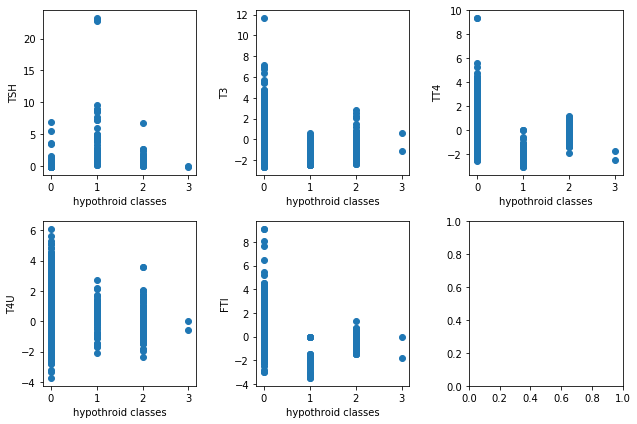

In [79]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(9, 6))
ax[0, 0].scatter(hypodata["classes"], hypodata["TSH"])
ax[0, 0].set_xscale("linear")
ax[0, 0].set_ylabel('TSH')
ax[0, 0].set_xlabel('hypothroid classes')
ax[0, 1].scatter(hypodata["classes"], hypodata["T3"])
ax[0, 1].set_xscale("linear")
ax[0, 1].set_ylabel('T3')
ax[0, 1].set_xlabel('hypothroid classes')
ax[0, 2].scatter(hypodata["classes"], hypodata["TT4"])
ax[0, 2].set_xscale("linear")
ax[0, 2].set_ylabel('TT4')
ax[0, 2].set_xlabel('hypothroid classes')
ax[1, 0].scatter(hypodata["classes"], hypodata["T4U"])
ax[1, 0].set_xscale("linear")
ax[1, 0].set_ylabel('T4U')
ax[1, 0].set_xlabel('hypothroid classes')
ax[1, 1].scatter(hypodata["classes"], hypodata["FTI"])
ax[1, 1].set_xscale("linear")
ax[1, 1].set_ylabel('FTI')
ax[1, 1].set_xlabel('hypothroid classes')
plt.tight_layout()
plt.savefig("thyroid hormones.png", dpi=300)
### TSH are higher in class 1
### T3 levels are lower in class 1, 2 and 3
### TT4 levels are lower in class 1, 2 and 3
### FTI levels are lower in class 1, 2 and 3